In [1]:
%load_ext lab_black
%load_ext autotime
import pandas as pd
import numpy as np

time: 369 ms (started: 2023-12-09 10:42:49 -08:00)


The [MNIST-1D](https://github.com/greydanus/mnist1d) dataset is a small (n = 5000), low-dimensional (D = 40) synthetic dataset that replaces the hand-written digits from the [MNIST digits](https://yann.lecun.com/exdb/mnist/) dataset with roughly similar 1D template patterns to represent the digits, which are then randomly transformed to create 500 examples per "digit". While smaller, it's harder to separate these classes. You could see these as time-series data or a 1D image.

In [2]:
import requests, pickle

url = "https://github.com/greydanus/mnist1d/raw/master/mnist1d_data.pkl"
response = requests.get(url, allow_redirects=True)

data = pickle.loads(response.content)
data.keys()

dict_keys(['x', 'x_test', 'y', 'y_test', 't', 'templates'])

time: 1.23 s (started: 2023-12-09 10:42:49 -08:00)


In [3]:
X = np.concatenate((data["x"], data["x_test"]))
y = np.concatenate((data["y"], data["y_test"]))

time: 3.63 ms (started: 2023-12-09 10:42:50 -08:00)


In [4]:
X.shape

(5000, 40)

time: 8.22 ms (started: 2023-12-09 10:42:50 -08:00)


In [5]:
y.shape, y[:10]

((5000,), array([2, 6, 4, 5, 6, 6, 6, 0, 3, 1]))

time: 4.57 ms (started: 2023-12-09 10:42:50 -08:00)


In [6]:
pd.Series(y).value_counts()

2    500
6    500
4    500
5    500
0    500
3    500
1    500
9    500
8    500
7    500
dtype: int64

time: 6.32 ms (started: 2023-12-09 10:42:50 -08:00)


In [7]:
from drnb.io.pipeline import create_default_pipeline

data_result = create_default_pipeline(check_for_duplicates=True).run(
    "mnist1d",
    data=X,
    target=pd.Series(y, name="Class"),
    tags=["synthetic", "lowdim", "small"],
    url="https://github.com/greydanus/mnist1d",
    verbose=True,
)

[10:42:55] INFO     Requesting one extra neighbor to account for self-neighbor                      ]8;id=94823;file:///home/james/dev/drnb/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=939956;file:///home/james/dev/drnb/src/drnb/neighbors/__init__.py#599\599]8;;\

           INFO     Initial data shape: (5000, 40)                                                   ]8;id=946452;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=855606;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#77\77]8;;\

           INFO     Keeping all columns                                                            ]8;id=657102;file:///home/james/dev/drnb/src/drnb/preprocess.py\preprocess.py]8;;\:]8;id=79087;file:///home/james/dev/drnb/src/drnb/preprocess.py#73\73]8;;\

           INFO     Data shape after filtering columns: (5000, 40)                                  ]8;id=381434;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=126716;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#148\148]8;;\

           INFO     Removing rows with NAs                                                          ]8;id=235737;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=625245;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#132\132]8;;\

           INFO     Data shape after filtering NAs: (5000, 40)                                      ]8;id=227015;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=618153;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#143\143]8;;\

           INFO     Checked for duplicates: found 0                                                 ]8;id=268865;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=559680;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#155\155]8;;\

           INFO     No scaling                                                                     ]8;id=10855;file:///home/james/dev/drnb/src/drnb/preprocess.py\preprocess.py]8;;\:]8;id=343869;file:///home/james/dev/drnb/src/drnb/preprocess.py#28\28]8;;\

           INFO     Converting to numpy with {'dtype': 'float32', 'layout': 'c'}                    ]8;id=918203;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=997675;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#160\160]8;;\

           INFO     Writing data for mnist1d                                                        ]8;id=283572;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=348772;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#228\228]8;;\

           INFO     Processing target with initial shape (5000, 1)                                  ]8;id=512459;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=10244;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#199\199]8;;\

           INFO     Keeping all columns                                                            ]8;id=266211;file:///home/james/dev/drnb/src/drnb/preprocess.py\preprocess.py]8;;\:]8;id=704168;file:///home/james/dev/drnb/src/drnb/preprocess.py#73\73]8;;\

           INFO     Writing target for mnist1d                                                      ]8;id=904569;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=476908;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#228\228]8;;\

           INFO     Calculating nearest neighbors                                                   ]8;id=428394;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=437155;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#243\243]8;;\

           INFO     Loading faiss with AVX2 support.                                                   ]8;id=805053;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss-1.7.4-py3.10.egg/faiss/loader.py\loader.py]8;;\:]8;id=332346;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss-1.7.4-py3.10.egg/faiss/loader.py#54\54]8;;\

           INFO     Successfully loaded faiss with AVX2 support.                                       ]8;id=43704;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss-1.7.4-py3.10.egg/faiss/loader.py\loader.py]8;;\:]8;id=736203;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss-1.7.4-py3.10.egg/faiss/loader.py#56\56]8;;\

           INFO     Using 'faiss' to find nearest neighbors                                          ]8;id=978061;file:///home/james/dev/drnb/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=306333;file:///home/james/dev/drnb/src/drnb/neighbors/__init__.py#83\83]8;;\

           INFO     Finding 151 neighbors using faiss with euclidean metric and params: {}           ]8;id=444531;file:///home/james/dev/drnb/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=598440;file:///home/james/dev/drnb/src/drnb/neighbors/__init__.py#96\96]8;;\

[10:42:56] INFO     Writing numpy format to nn/mnist1d.16.euclidean.exact.faiss.idx.npy             ]8;id=989006;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=852755;file:///home/james/dev/drnb/src/drnb/io/__init__.py#306\306]8;;\

           INFO     Writing csv format to nn/mnist1d.16.euclidean.exact.faiss.idx.csv               ]8;id=815249;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=184707;file:///home/james/dev/drnb/src/drnb/io/__init__.py#283\283]8;;\

           INFO     Writing numpy format to nn/mnist1d.16.euclidean.exact.faiss.dist.npy            ]8;id=38414;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=26611;file:///home/james/dev/drnb/src/drnb/io/__init__.py#306\306]8;;\

           INFO     Writing csv format to nn/mnist1d.16.euclidean.exact.faiss.dist.csv              ]8;id=489895;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=166736;file:///home/james/dev/drnb/src/drnb/io/__init__.py#283\283]8;;\

           INFO     Writing numpy format to nn/mnist1d.51.euclidean.exact.faiss.idx.npy             ]8;id=426872;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=585879;file:///home/james/dev/drnb/src/drnb/io/__init__.py#306\306]8;;\

[10:42:57] INFO     Writing csv format to nn/mnist1d.51.euclidean.exact.faiss.idx.csv               ]8;id=229725;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=942276;file:///home/james/dev/drnb/src/drnb/io/__init__.py#283\283]8;;\

           INFO     Writing numpy format to nn/mnist1d.51.euclidean.exact.faiss.dist.npy            ]8;id=529127;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=676703;file:///home/james/dev/drnb/src/drnb/io/__init__.py#306\306]8;;\

[10:42:58] INFO     Writing csv format to nn/mnist1d.51.euclidean.exact.faiss.dist.csv              ]8;id=672796;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=664046;file:///home/james/dev/drnb/src/drnb/io/__init__.py#283\283]8;;\

           INFO     Writing numpy format to nn/mnist1d.151.euclidean.exact.faiss.idx.npy            ]8;id=205910;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=822921;file:///home/james/dev/drnb/src/drnb/io/__init__.py#306\306]8;;\

           INFO     Writing csv format to nn/mnist1d.151.euclidean.exact.faiss.idx.csv              ]8;id=244763;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=86487;file:///home/james/dev/drnb/src/drnb/io/__init__.py#283\283]8;;\

           INFO     Writing numpy format to nn/mnist1d.151.euclidean.exact.faiss.dist.npy           ]8;id=535119;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=951994;file:///home/james/dev/drnb/src/drnb/io/__init__.py#306\306]8;;\

           INFO     Writing csv format to nn/mnist1d.151.euclidean.exact.faiss.dist.csv             ]8;id=426280;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=403208;file:///home/james/dev/drnb/src/drnb/io/__init__.py#283\283]8;;\

[10:42:59] INFO     Calculating triplets                                                            ]8;id=154547;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=49602;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#254\254]8;;\

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


[10:43:00] INFO     Writing csv format to triplets/mnist1d.5.1337.idx.csv                           ]8;id=635653;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=537809;file:///home/james/dev/drnb/src/drnb/io/__init__.py#283\283]8;;\

           INFO     Writing csv format to triplets/mnist1d.5.1337.euclidean.csv                     ]8;id=676931;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=589990;file:///home/james/dev/drnb/src/drnb/io/__init__.py#283\283]8;;\

[10:43:01] INFO     Writing numpy format to triplets/mnist1d.5.1337.idx.npy                         ]8;id=650227;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=405223;file:///home/james/dev/drnb/src/drnb/io/__init__.py#306\306]8;;\

           INFO     Writing numpy format to triplets/mnist1d.5.1337.euclidean.npy                   ]8;id=667226;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=683139;file:///home/james/dev/drnb/src/drnb/io/__init__.py#306\306]8;;\

           INFO     Writing pipeline result for mnist1d                                             ]8;id=865872;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=647576;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#125\125]8;;\

time: 10.3 s (started: 2023-12-09 10:42:50 -08:00)


Let's quickly confirm the [confirmation by Dmitry Kobak](https://github.com/greydanus/mnist1d#dimensionality-reduction) that MNIST-1D is much harder to get nice clusters out of than MNIST (although we will use UMAP instead of t-SNE):

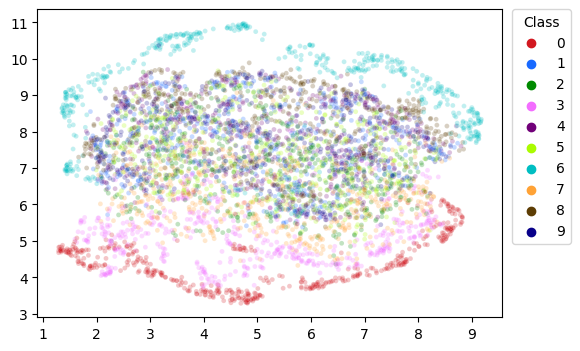

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=0.72092, info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=0.6437085426899809, info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=0.21070666666666665, info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=0.23995600000000003, info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=0.2818346666666667, info={'metric': 'euclidean', 'n_neighbors': 150})]

time: 13.2 s (started: 2023-12-09 10:43:01 -08:00)


In [8]:
import drnb.embed.pipeline as pl

pl.standard_eval(
    method="umap",
    dataset="mnist1d",
)